<a href="https://colab.research.google.com/github/890Pratik/Airbnb-Booking-Analysis/blob/main/Final_Notebook_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Airbnb  :**
## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>





# **What can we learn about different hosts and areas?**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,48885,48886,48887,48888,48889,48890,48891,48892,48893,48894
id,2539,2595,3647,3831,5022,5099,5121,5178,5203,5238,...,36482809,36483010,36483152,36484087,36484363,36484665,36485057,36485431,36485609,36487245
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm,...,Stunning Bedroom NYC! Walking to Central Park!!,Comfy 1 Bedroom in Midtown East,Garden Jewel Apartment in Williamsburg New York,"Spacious Room w/ Private Rooftop, Central loca...",QUIT PRIVATE HOUSE,Charming one bedroom - newly renovated rowhouse,Affordable room in Bushwick/East Williamsburg,Sunny Studio at Historical Neighborhood,43rd St. Time Square-cozy single bed,Trendy duplex in the very heart of Hell's Kitchen
host_id,2787,2845,4632,4869,7192,7322,7356,8967,7490,7549,...,131529729,274311461,208514239,274321313,107716952,8232441,6570630,23492952,30985759,68119814
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura,Chris,Garon,Shunichi,MaryEllen,Ben,...,Kendall,Scott,Melki,Kat,Michael,Sabrina,Marisol,Ilgar & Aysel,Taz,Christophe
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan,...,Manhattan,Manhattan,Brooklyn,Manhattan,Queens,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown,...,East Harlem,Midtown,Williamsburg,Hell's Kitchen,Jamaica,Bedford-Stuyvesant,Bushwick,Harlem,Hell's Kitchen,Hell's Kitchen
latitude,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.76489,40.80178,40.71344,...,40.79633,40.75561,40.71232,40.76392,40.69137,40.67853,40.70184,40.81475,40.75751,40.76404
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.98493,-73.96723,-73.99037,...,-73.93605,-73.96723,-73.9422,-73.99183,-73.80844,-73.94995,-73.93317,-73.94867,-73.99112,-73.98933
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt,...,Private room,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Private room,Entire home/apt,Shared room,Private room
price,149,225,150,89,80,200,60,79,79,150,...,75,200,170,125,65,70,40,115,55,90


In [ ]:
df.shape

(48895, 16)

##Each column in the dataframe gives us information about the property.



*  The **name** of the property is set by the host

*  **host_id** and **host_name** are identification ids of the host for Airbnb
*  There are five groups in **neighbourhood_group** , such as Bronx	Brooklyn, Manhattan,	Queens
,Staten Island.
*  The **neighbourhood** tells us which specific neighbourhood in the group the property belongs to.
*  **latitude** and **longitude** give us the coordinates of the location. We can use this with folium to map all the locations.
*  **room_type** indicates the type of room the property is.
*  **price** is the value of that particular booking.
*   **minimum_nights** are the minimum number of nights the property has to be booked for.
* **number_of_reviews**, **last_review**, and **reviews_per_month** give us information about the reviews of each property. Unfortunately, we don't have the actual reviews or rating.
* **calculated_host_listings_count** and **availability_365** are additional features that tell us how many total properties the host has, and how long this property is available in a year  List item.


# Observation:

Total 16 columns are present in the dataset.

Total observations are 48895.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
(df== 0).sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

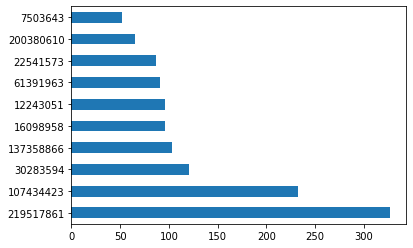

In [ ]:
df.host_id.value_counts().head(10).plot(kind='barh')

#Observation

**This graph above is a plot between host ID and the number of air bnb that are managed by them.From this graph we can find the top 10 people that owns or manages most number of airbnbs in New York city.we can see that there is a good distribution between top 10 hosts with the most listings. First host has more than 300+ listings.**





In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Observations:

-There are total four columns with null values.

-name column is having total 16 null values.

-host_name is having 21 null values.

-last_review and reviews_per_month are having more null values.

-we will look at the columns and decide what we can do with them.

# *Filling the null values of reviews_per_month with 0*

In [ ]:
df['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
df['reviews_per_month'].isnull().values.any()

False

# *Since both the name and host_name has very less missing values, therefore we can fill this missing value with unknown and no_name respectively*

In [ ]:
df['name'].fillna('unknown',inplace=True)
df['host_name'].fillna('no_name',inplace=True)

In [ ]:
new_id = df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_id.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Plotting the over all listings in New york city**

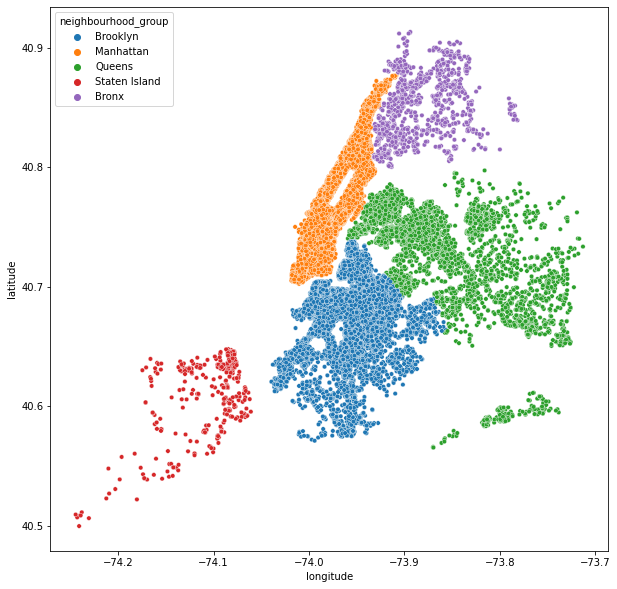

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data= df)

# ***2. What can we learn from predictions? (ex: locations, prices, reviews, etc)***

In [ ]:
reviews = df.groupby(['neighbourhood_group','host_name'])['number_of_reviews'].max().reset_index()
reviews

,neighbourhood_group,host_name,number_of_reviews
0,Bronx,Aaron,0
1,Bronx,Aboubakar,23
2,Bronx,Ada Azra,10
3,Bronx,Adam,0
4,Bronx,Adama,51
...,...,...,...
15342,Staten Island,Xiomara,29
15343,Staten Island,Yien,8
15344,Staten Island,Yulia,1
15345,Staten Island,Yun,51


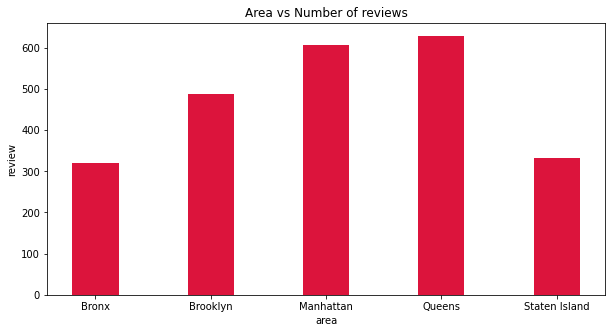

In [ ]:
area = reviews['neighbourhood_group']
review = reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
plt.bar(area, review, color ='#DC143C',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [ ]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


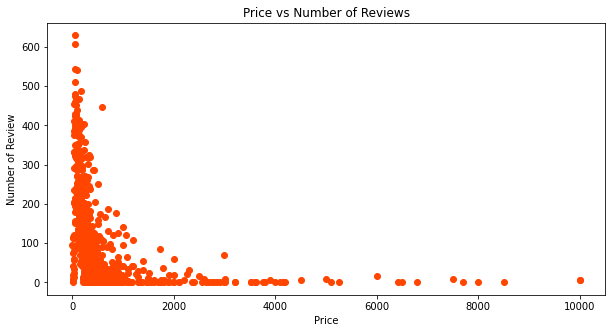

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
plt.scatter(area, price, color = '#FF4500')
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

#**From the above Analysis we can say that most people prefer to stay in place where price is less**

#**3. Which hosts are the busiest and why?**


In [ ]:
hosts_most = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
hosts_most = hosts_most.sort_values(by='number_of_reviews', ascending=False).head(10)
hosts_most

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


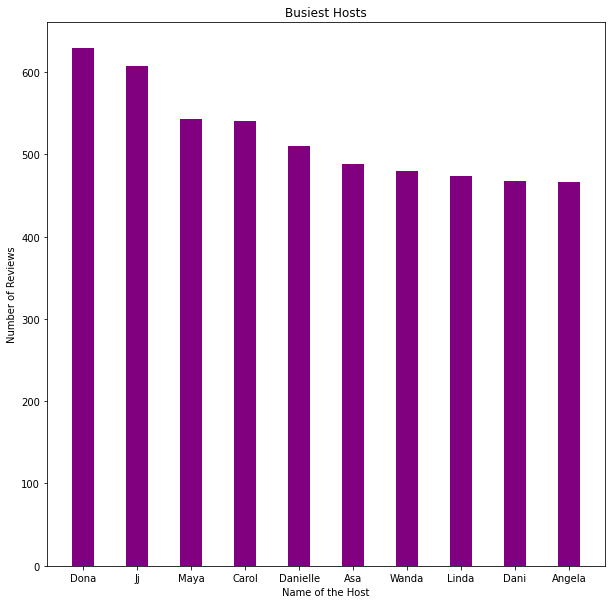

In [ ]:
name = hosts_most['host_name']
reviews = hosts_most['number_of_reviews']

fig = plt.figure(figsize = (10, 10))
 
# creating the bar plot
plt.bar(name, reviews, color ='purple',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

# Inference

## Busiest hosts are:

1   Dona

2   Ji

3   Maya

4   Carol

5   Danielle 


## Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

# ***4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?***

In [ ]:
diff_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
diff_areas = diff_areas.sort_values(by='minimum_nights', ascending=False)
diff_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


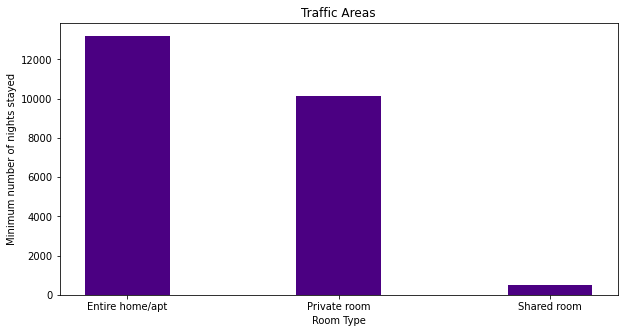

In [ ]:
room_type = diff_areas['room_type']
stayed = diff_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
plt.bar(room_type, stayed, color ='#4B0082',
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

#**Conclusion:**




1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3. Most people prefer to pay less price.
4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5. If people are not staying more then one night means they are travellers. 


# **5 Plotting a pie chart of neighbourhood_group**

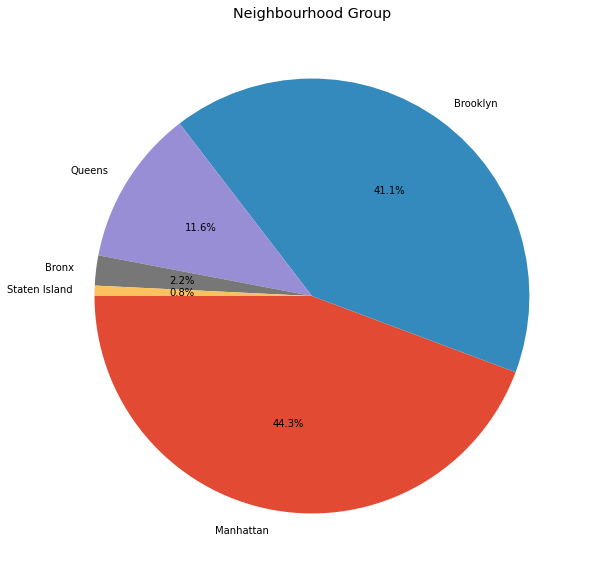

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,10))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'room type')

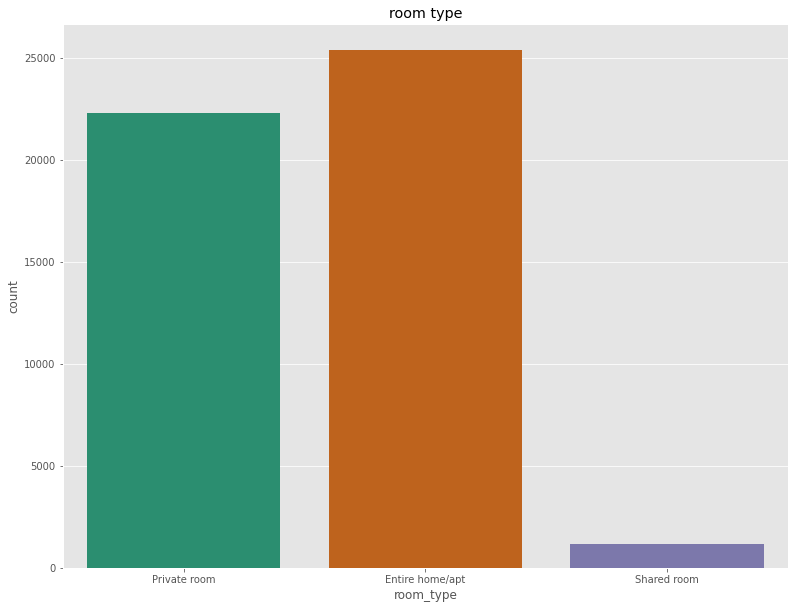

In [ ]:
sns.countplot(df['room_type'], palette='Dark2')
fig = plt.gcf()
fig.set_size_inches(13,10)
plt.title('room type')

#**From this graph we infer the maximum number of airbnbs in the whole of NYC are that of entire room type.**


# **6 We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


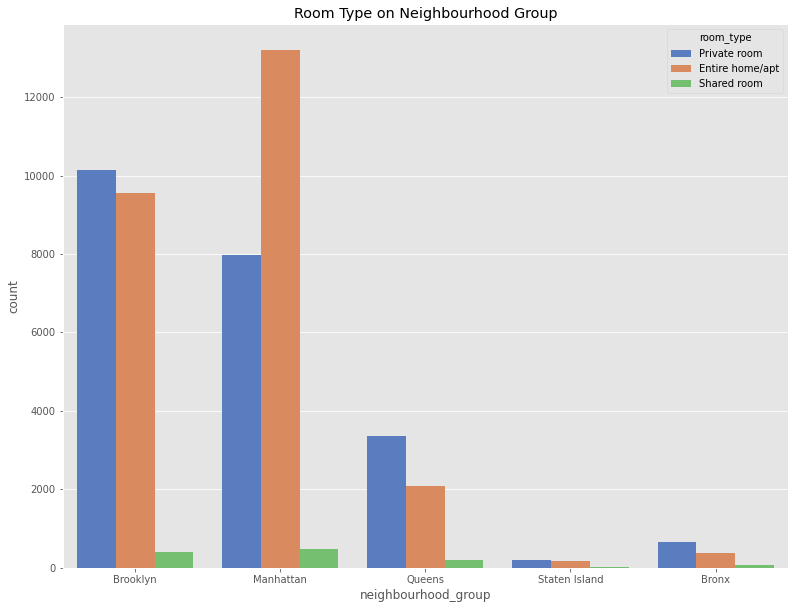

In [ ]:
plt.figure(figsize=(13,10))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

# ***We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room. From this graph we infer that Manhattan has the maximum number of airbnbs in the whole of NYC***

# **7 The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.**

In [ ]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
neighbour_unique_counts = df['neighbourhood'].value_counts()
neighbour_unique_counts 

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

# Observations:

There are 221 unique neighbor.

In [ ]:
#Top 50 most common neighbour
from collections import Counter
#.most_common() Return a list of the n most common elements and their counts from the most common to the least.
top_50_= Counter(df['neighbourhood']).most_common()
top_50_=top_50_[0:50]
top_50_[:20]

[('Williamsburg', 3920),
 ('Bedford-Stuyvesant', 3714),
 ('Harlem', 2658),
 ('Bushwick', 2465),
 ('Upper West Side', 1971),
 ("Hell's Kitchen", 1958),
 ('East Village', 1853),
 ('Upper East Side', 1798),
 ('Crown Heights', 1564),
 ('Midtown', 1545),
 ('East Harlem', 1117),
 ('Greenpoint', 1115),
 ('Chelsea', 1113),
 ('Lower East Side', 911),
 ('Astoria', 900),
 ('Washington Heights', 899),
 ('West Village', 768),
 ('Financial District', 744),
 ('Flatbush', 621),
 ('Clinton Hill', 572)]

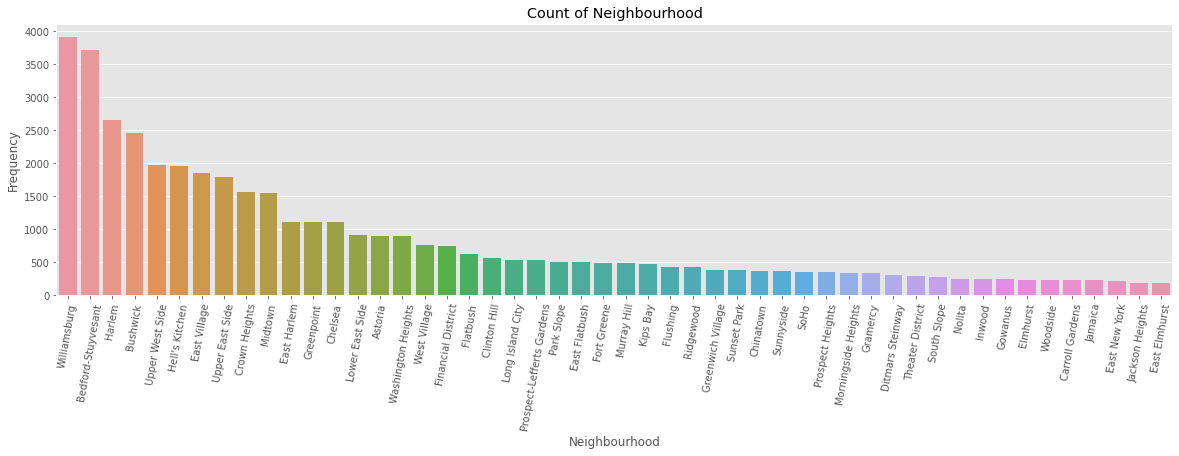

In [ ]:
#count_plot
plt.figure(figsize=(20,5))
ax_4 = sns.barplot(x='neighbourhood',y='count',data = pd.DataFrame(top_50_,columns=['neighbourhood','count'][:20]))
ax_4.set_title('Count of Neighbourhood')
ax_4.set_ylabel('Frequency')
ax_4.set_xlabel('Neighbourhood')
ax_4.set_xticklabels(ax_4.get_xticklabels(), rotation=80);
plt.show()

## **8) 10 hosts with most listings counts in entire NYC**

In [ ]:
top_10_hosts = df['host_name'].value_counts()[:11]

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

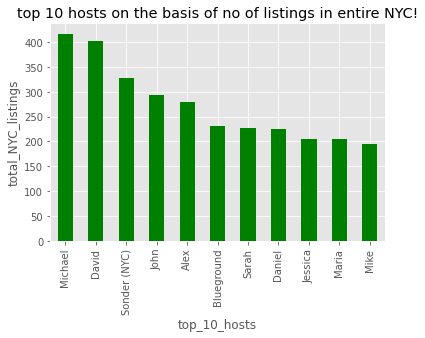

In [ ]:
top_10_hosts.plot(kind= 'bar',color = 'Green')
plt.xlabel('top_10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')

In [ ]:
No_of_hosts = df['host_name'].nunique()
print(f'The total no of hosts is:{No_of_hosts}')


No_of_listings = df['name'].nunique()
print(f'The total no of listings is: {No_of_listings}')

The total no of hosts is:11453
The total no of listings is: 47906


## **9  Top 10 listings on AIRBNB with most number of listing**

In [ ]:
listings_count_df= df['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,unknown,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


In [ ]:
Hosts_area =df.groupby(['neighbourhood_group','neighbourhood'])['calculated_host_listings_count'].count().reset_index()
Hosts_area.sort_values(by='calculated_host_listings_count',ascending=False).head(20)

,neighbourhood_group,neighbourhood,calculated_host_listings_count
93,Brooklyn,Williamsburg,3920
50,Brooklyn,Bedford-Stuyvesant,3714
105,Manhattan,Harlem,2658
58,Brooklyn,Bushwick,2465
124,Manhattan,Upper West Side,1971
106,Manhattan,Hell's Kitchen,1958
100,Manhattan,East Village,1853
123,Manhattan,Upper East Side,1798
65,Brooklyn,Crown Heights,1564
112,Manhattan,Midtown,1545


In [ ]:
reviews_of_areas = df.groupby(['name','neighbourhood_group','room_type','minimum_nights','price'])['number_of_reviews'].count().reset_index()
reviews_of_areas.sort_values(by='number_of_reviews',ascending=False).head(20)

,name,neighbourhood_group,room_type,minimum_nights,price,number_of_reviews
22524,Hillside Hotel,Queens,Private room,1,135,12
26248,Loft Suite @ The Box House Hotel,Brooklyn,Entire home/apt,3,199,11
4619,Artsy Private BR in Fort Greene Cumberland,Brooklyn,Private room,30,48,10
23573,IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NAT...,Manhattan,Entire home/apt,30,175,5
22525,Hillside Hotel,Queens,Private room,1,165,5
26961,Luminous Modern Apt Share for Young Professionals,Brooklyn,Private room,30,60,4
29594,"Modern, Cozy Apt Share for Young Professionals",Brooklyn,Private room,30,60,4
26247,Loft Suite @ Box House Hotel,Brooklyn,Entire home/apt,3,199,4
44147,Superior @ Box House,Brooklyn,Private room,3,179,3
38754,Sonder | The Biltmore | Spacious 1BR + Kitchen,Manhattan,Entire home/apt,29,699,3


# **9) Neighbourhood Group and Availability of Room**

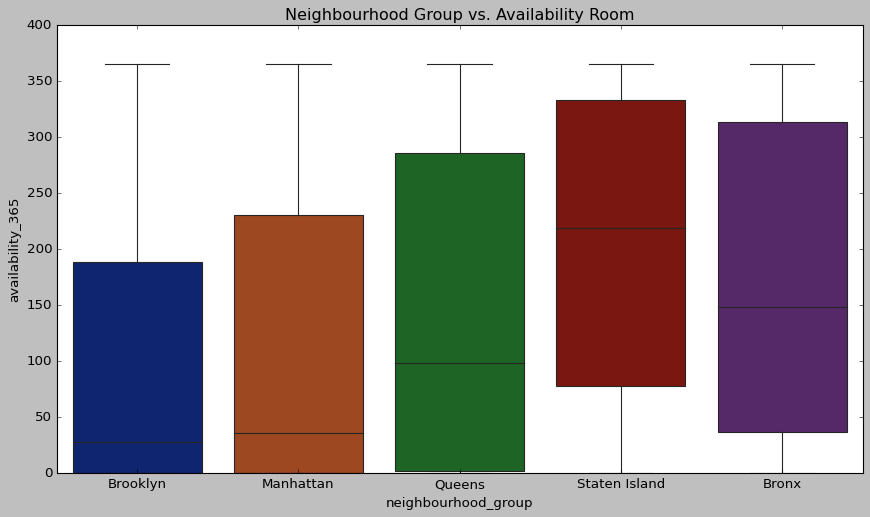

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

In [ ]:
df['price'].unique

<bound method Series.unique of 0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64>

In [ ]:
#Price

df[['price']].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [ ]:
# Function to category the types of room

def price_category(price):
  if price<80:
    return'Cheap'

  elif price >=80 and price < 500:
    return 'Affordable'
  
  else :
    return 'Expensive'

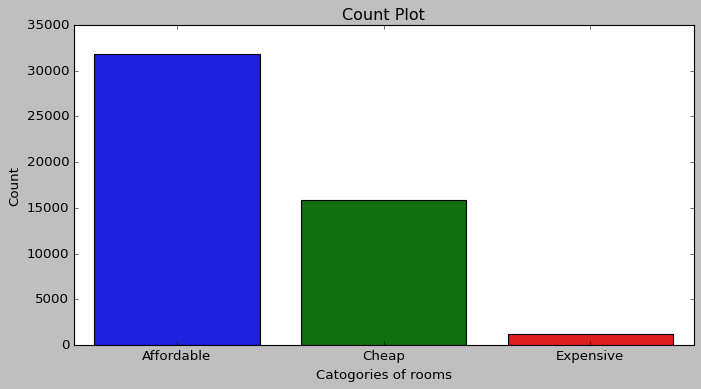

In [ ]:
plt.figure(figsize=(10,5))
ax_7 = sns.countplot(x=df['price'].apply(price_category))
ax_7.set_title('Count Plot')
ax_7.set_xlabel('Catogories of rooms')
ax_7.set_ylabel("Count")
plt.show()

Observations

we have considered to devide the whole price range into three catogories

1.cheap (price range below or equal to 80$)

2.Affordable(for price range 80 to 500$)

3.Expensive(for price range more then 500$) so, it look like people have more   
  intrest in having "affordable" rooms/apartments rathre then having cheep and  
  expensive rooms.

# **Relationship between neighbourhood_group and price**

In [ ]:
df_price = pd.DataFrame(df['price'].apply(price_category))
df_price.head(10)

,price
0,Affordable
1,Affordable
2,Affordable
3,Affordable
4,Affordable
5,Affordable
6,Cheap
7,Cheap
8,Cheap
9,Affordable


In [ ]:
df['price'].value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

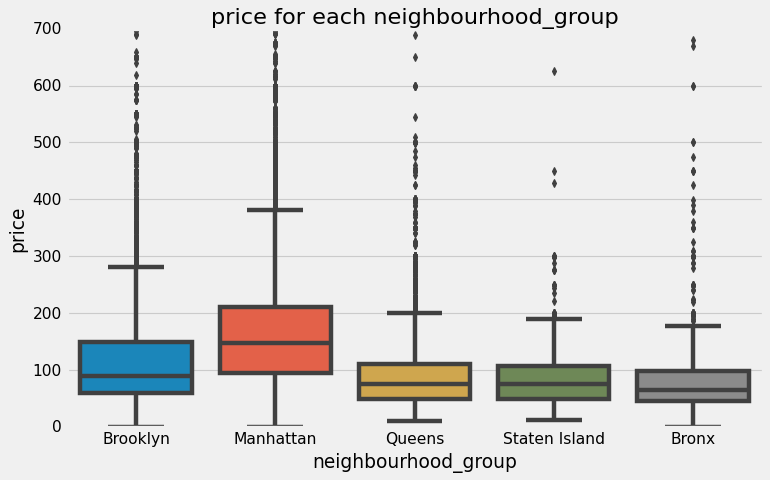

In [ ]:
plt.style.use('fivethirtyeight')

price_500 = df[df.price <700]
plt.figure(figsize=(10,6))
plt.title("price for each neighbourhood_group")
sns.boxplot(y= 'price',x= 'neighbourhood_group',data=price_500)
plt.show()

# Observations:

1.We can see that Manhattam is the most expensive destination immediatly followed by Brooklyn.

2.Queens, staten island and Bronx, are having price range less as compaired to other two.

#**10) What are the neighbourhoods or the neighbourhood groups where the owners are preffering longer stays rather than one shorter inn type stays?**

In [ ]:
df.groupby('neighbourhood_group')['minimum_nights'].mean()

neighbourhood_group
Bronx            4.560953
Brooklyn         6.056556
Manhattan        8.579151
Queens           5.181433
Staten Island    4.831099
Name: minimum_nights, dtype: float64

In [ ]:
df.groupby('neighbourhood')['minimum_nights'].mean()

neighbourhood
Allerton            2.214286
Arden Heights       9.500000
Arrochar            2.761905
Arverne             1.649351
Astoria             6.036667
                     ...    
Windsor Terrace     8.713376
Woodhaven           2.795455
Woodlawn            1.454545
Woodrow             7.000000
Woodside           10.314894
Name: minimum_nights, Length: 221, dtype: float64

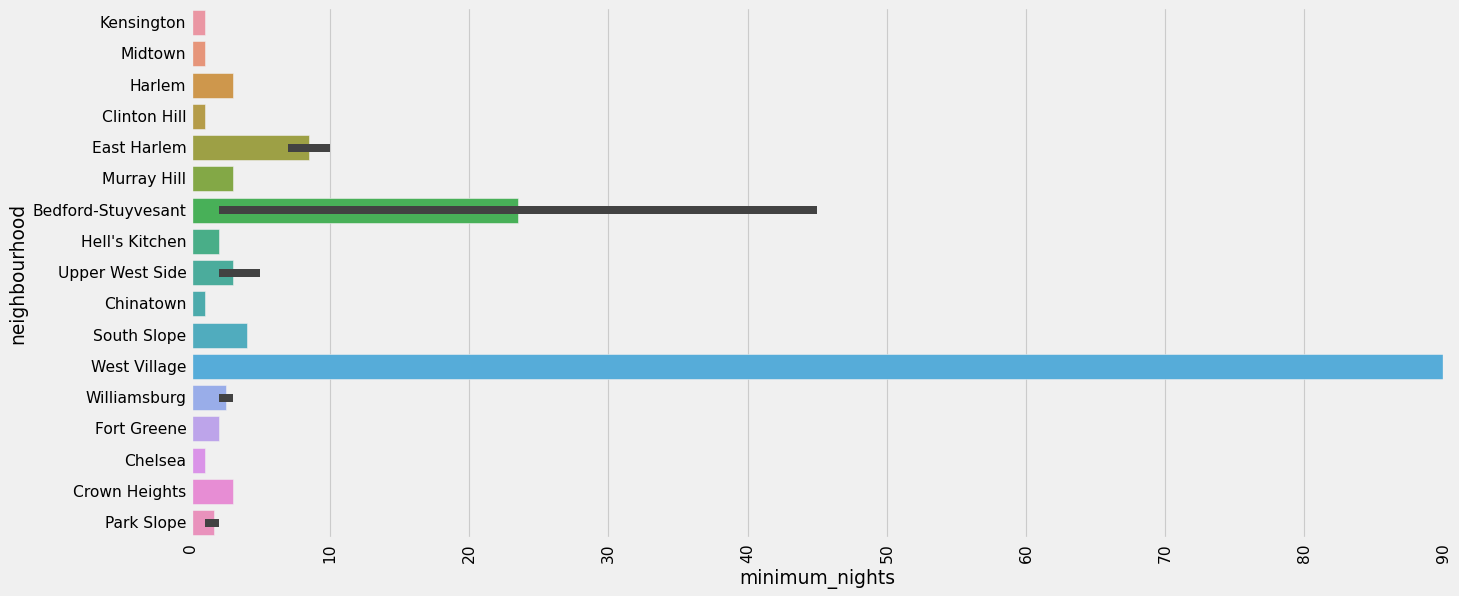

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x=df.minimum_nights[:25], y=df.neighbourhood[:25]) 
plt.xticks(rotation=90)
plt.show()

#Observation
The average number of nights stay is higest in Manhattan with a value of 10.7 days. and when it comes to neighbourhoods,East Village is the place with maximum number of average minimum nuights stay with an average value of 14 days.


# New Section Summary

Airbnb Bookings Analysis was done by a group of 3 members - Pratik Sunar, Anitesh Kumar, Moin Quraishi. in this project we got a csv file as an input and the file had  48895 rows and 16 columns 


 **Pratik Sunar** -  we first decided to take up the project and perform some exploration of the airbnb bookoings Analysis.csv  file, so i mounted the file with drive and made a dataframe to read and explore the file and found out that **nmae, host_name, last_reviews, reviews_per_month** had null values so i decided to replace the null values of name with 'unknown', host_name with 'no_name' and reviews_per_month with '0'. as we distributed the task to plot and explore the the relation of columns. therefore, I plotted a pie chart of '**neighbourhood_group**' that dipicts the share of areas that has  Airbnb listings in NYC and also plotted a bar graph of '**room_type**' that dipicts Entire Home/Apartment has the highhest share followed by private room and least preferred is  Shared room after completing that task found out that '**Room type on neighbourhood group** can also be ploted to see the comparison  of share room type on different location and the graph depicts that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.


 

**Moin Quraishi** - We decided to take up the topic of Airbnb Bookings and the data which we used here is the bookings of New York City which were made at the year 2019, first we performed the basic analysis of what all factors do we have in our data which can give insights of the bookings made by the hosts and what are there type.I added the description of each column of the data we have which helps us to understand the data easily.At first, I plotted a scatter graph for each listing by latitude and longitude for the same which gives the broad view  of the listings in entire NYC. Then I wanted to differentiate the trafiic among different areas for which I plotted a bar graph between **room_type** and **minimum_nights** stayed, garph depict that The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only. Then I wanted to check the avalibily of rooms among Categories across the prices, so i divided the bookings in 3 types such as Expensive, Affordable and Cheap from which I got that most of the bookings made by host are in Affordable Categories.  

**Anitesh Kumar**- we decided to take up the topic of Airbnb Booking and the data which is Based on our price heat map observation, we need to visualize the price distribution using a box plot to understand more on the listing price range grouped by the ‘neighbourhood_group’ /region area. the listing price might be related to the surrounding property price and found out the connectivity of the listing to its surrounding becomes one of the common selling value.  Analysis we can say that most people prefer to stay in place where price is less, hosts listed room type as Entire home and Private room which is preferred by most number of people.